MAGOMU EMMANUEL
B27294
M24B38/011

A.CHECKING FOR OUTLIERS.

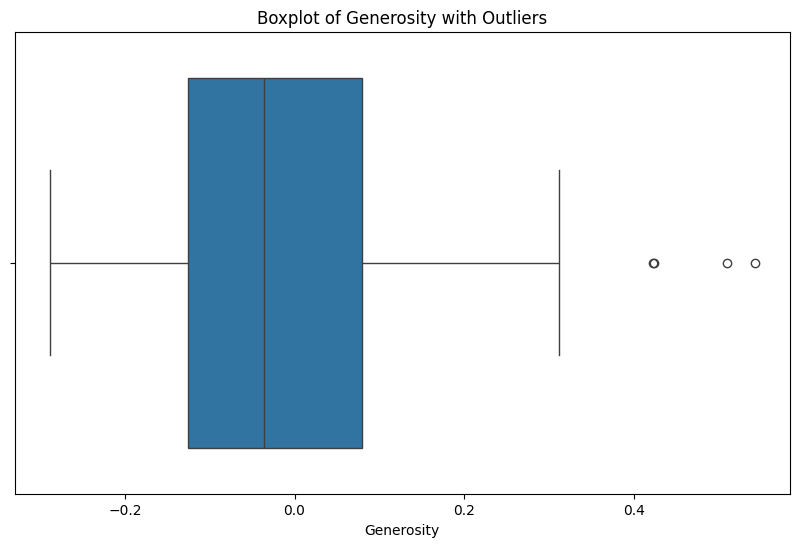

Number of outliers: 4
Outlier countries and their generosity values:
    Country name  Generosity
81     Indonesia       0.542
97        Gambia       0.424
125      Myanmar       0.509
142        Haiti       0.422


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('Q2_world-happiness-report-2021.xls')

Q1 = df['Generosity'].quantile(0.25)
Q3 = df['Generosity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Generosity'] < lower_bound) | (df['Generosity'] > upper_bound)]

# Creating box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Generosity'])
plt.title('Boxplot of Generosity with Outliers')
plt.show()

#  Number of outliers and statistics
print("Number of outliers:", len(outliers))
print("\
Outlier countries and their generosity values:")
print(outliers[['Country name', 'Generosity']].to_string())



B.RELATIONSHIP BTN REGIONAL INDICATOR AND PERCEPTIONS OF CORRUPTION

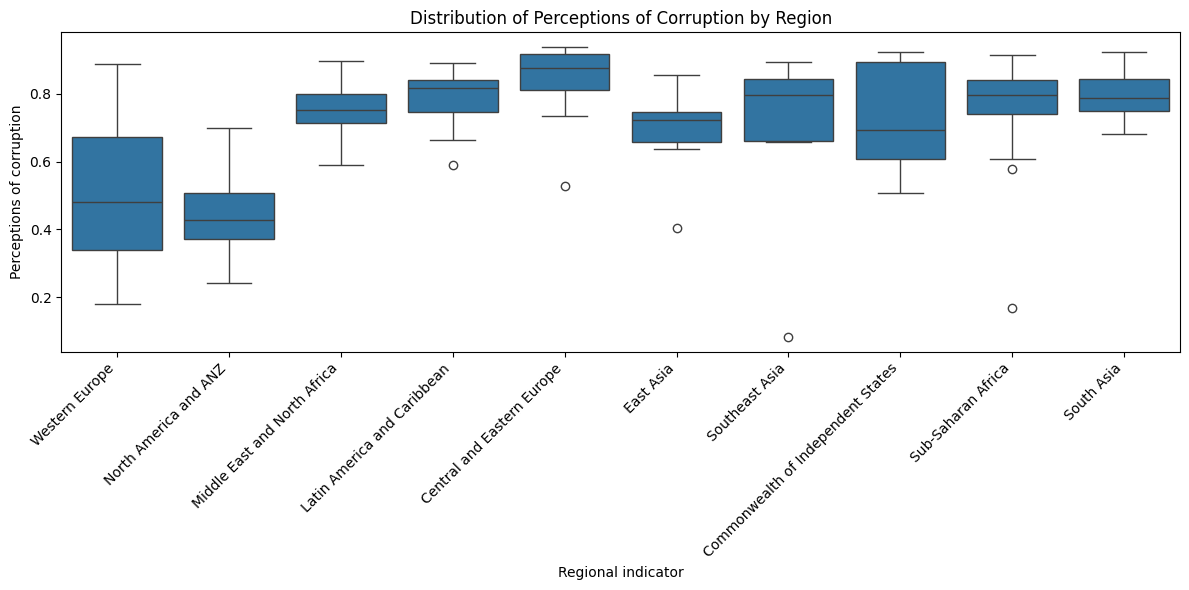

Statistical Analysis:
One-way ANOVA F-statistic: 8.22446391074328
P-value: 9.51403492478289e-10
Detailed Statistics by Region:
                                    count      mean       std    min      25%  \
Regional indicator                                                              
Central and Eastern Europe           17.0  0.850529  0.102474  0.527  0.81200   
Commonwealth of Independent States   12.0  0.725083  0.164244  0.506  0.60850   
East Asia                             6.0  0.683333  0.154219  0.403  0.65875   
Latin America and Caribbean          20.0  0.792600  0.080603  0.590  0.74725   
Middle East and North Africa         17.0  0.762235  0.080509  0.589  0.71400   
North America and ANZ                 4.0  0.449250  0.188020  0.242  0.37175   
South Asia                            7.0  0.797429  0.081672  0.682  0.75050   
Southeast Asia                        9.0  0.709111  0.250301  0.082  0.66000   
Sub-Saharan Africa                   36.0  0.765944  0.127012  

In [2]:



#Using a Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Regional indicator', y='Perceptions of corruption', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Perceptions of Corruption by Region')
plt.tight_layout()
plt.show()

#One-way ANOVA TEST
regions = df['Regional indicator'].unique()
corruption_by_region = [df[df['Regional indicator'] == region]['Perceptions of corruption'] for region in regions]
f_stat, p_value = stats.f_oneway(*corruption_by_region)

print("\
Statistical Analysis:")
print("One-way ANOVA F-statistic:", f_stat)
print("P-value:", p_value)

# Descriptive statistics
desc_stats = df.groupby('Regional indicator')['Perceptions of corruption'].describe()
print("\
Detailed Statistics by Region:")
print(desc_stats)


C.CHECKING IF NULL HYPOTHESIS IS TRUE OR FALSE

Uganda's perception of corruption: 0.855
Global mean (2024): 0.43
Difference from global mean: 0.425
Percentage difference: 98.84%
Statistical Analysis:
Z-score: 2.371303512250947
P-value (z-test): 0.017725468578446035
Standard deviation of dataset: 0.17922631911280348


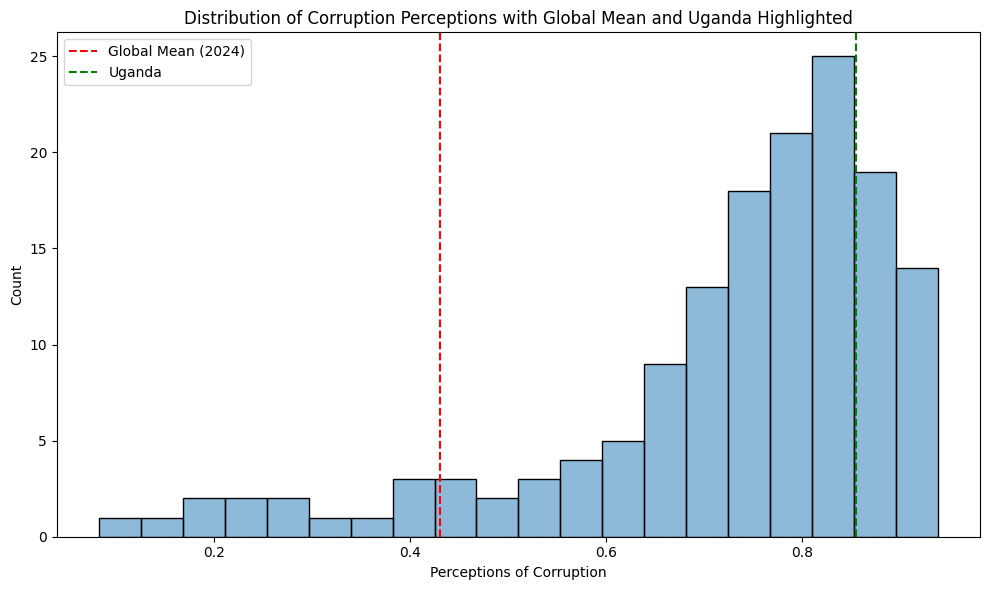

Conclusion:
I reject the null hypothesis: Uganda's perception of corruption is significantly different from the global mean


In [ ]:


# Getting Uganda's perception of corruption value
uganda_corruption = df[df['Country name'] == 'Uganda']['Perceptions of corruption'].values[0]
global_mean = 0.43  # Given global mean for 2024

# Basic statistics
print("Uganda's perception of corruption:", uganda_corruption)
print("Global mean (2024):", global_mean)
print("Difference from global mean:", uganda_corruption - global_mean)
print("Percentage difference: {:.2f}%".format(((uganda_corruption - global_mean) / global_mean) * 100))

#Z-score and p-value
uganda_mean = uganda_corruption
uganda_std = df['Perceptions of corruption'].std()
z_score = (uganda_mean - global_mean) / uganda_std
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test

print("\
Statistical Analysis:")
print("Z-score:", z_score)
print("P-value (z-test):", p_value_z)
print("Standard deviation of dataset:", uganda_std)

# Comparison using visualisation
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Perceptions of corruption', bins=20, alpha=0.5)
plt.axvline(x=global_mean, color='r', linestyle='--', label='Global Mean (2024)')
plt.axvline(x=uganda_corruption, color='g', linestyle='--', label='Uganda')
plt.title('Distribution of Corruption Perceptions \
with Global Mean and Uganda Highlighted')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

print("\
Conclusion:")
if p_value_z < 0.05:
    print("I reject the null hypothesis: Uganda's perception of corruption is significantly different from the global mean")
else:
    print("I refuse to reject the null hypothesis: No significant difference from the global mean")
